# SenseSmart

*Jerry Zhao, Xuying Yang, Yujuan Zhou, Clement Mo, Haozheng Liu*

---

## Project Name: Social Media Sentiment Analysis Dataset
**Dataset**: [Social Media Sentiment Analysis Dataset](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/code)

This project aims to analyze user-generated content across various social media platforms to uncover sentiment trends and user behavior. The dataset offers a rich source of data, including text-based content, user sentiments, timestamps, hashtags, user engagement metrics (likes and retweets), and geographical information. By exploring this data, we can identify how emotions fluctuate over time, platform, and geography. We will also investigate the correlation between popular content and user engagement metrics. 

**Problem Statement:**
The primary goal is to perform sentiment analysis, investigate temporal and geographical trends in user-generated content, and analyze platform-specific user behavior. The project will focus on identifying popular topics through hashtags, exploring engagement levels, and understanding regional differences in sentiment trends. 

**Tasks:**
- **Dataset Exploration:**
  - Gain familiarity with the dataset by understanding its structure and key features such as sentiment, timestamps, and user engagement (likes and retweets).
- **Sentiment Analysis:**
  - Conduct sentiment analysis to classify the user-generated content into different categories such as surprise, excitement, admiration, etc.
  - Visualize the distribution of sentiments and examine the emotional landscape of social media platforms.
- **Temporal Analysis:**
  - Explore temporal patterns in user sentiment over time using the "Timestamp" column.
  - Identify recurring themes, seasonal variations, or any significant trends in the data.
- **User Engagement Insights:**
  - Analyze user engagement by studying the likes and retweets associated with posts.
  - Investigate how sentiment correlates with higher levels of user engagement.
- **Platform-Specific Analysis:**
  -  Compare sentiment trends across various platforms using the "Platform" column.
  -  Identify how emotions differ depending on the platform.
- **Hashtag and Topic Trends:**
  - Explore trending topics by analyzing the hashtags.
  - Investigate the relationship between hashtags and user engagement or sentiment.
- **Geographical Trends:**
  - Examine regional sentiment variations using the "Country" column.
  - Understand how social media content and sentiment differ across various regions.
- **Cross-Feature Analysis:**
  - Combine features (e.g., sentiment and hashtags, sentiment and platform) to uncover deeper insights about user behavior and content trends.
- **Predictive Modeling (Optional):**
  - Explore the possibility of building predictive models to predict user engagement (likes/retweets) based on sentiment, hashtags, and platform.
  - Evaluate the performance of the model and explore its potential for predicting popular content. 

Students are encouraged to draw connections between data-driven insights and potential policy implications.

Students are encouraged to draw connections between data-driven insights and potential policy implications. The project should foster a deeper understanding of the dynamics of air quality in India and its impact on public health and the environment.

## Dataset acquisition
**Dataset**: [Social Media Sentiment Analysis Dataset](https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/code)

In [1]:
# Install needed packages
%pip -q install kagglehub pandas matplotlib scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Download dataset
from pathlib import Path
import kagglehub, zipfile, shutil

# # Download latest version
# path = kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset")
cache = Path(kagglehub.dataset_download("kashishparmar02/social-media-sentiments-analysis-dataset"))
print("KaggleHub cache:", cache)

# Prepare and clear ./data folder
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)
for p in data_dir.iterdir():
    if p.is_file():
        p.unlink() # remove file
    else:
        shutil.rmtree(p)

# Collect .csv files
csv_found = []
for f in cache.rglob("*.csv"):
    dst = data_dir / f.name
    if not dst.exists(): # Avoid duplicates
        shutil.copy2(f, dst)
        csv_found.append(dst.name)

# If none found, scan all zips and extract ONLY .csv files into ./data
if not csv_found:
    for z in cache.rglob("*.zip"):
        try:
            with zipfile.ZipFile(z) as zf:
                for member in zf.infolist():
                    # Filter by extension .csv
                    name = Path(member.filename).name
                    if name.lower().endswith(".csv"):
                        with zf.open(member) as src, open(data_dir / name, "wb") as dst:
                            shutil.copyfileobj(src, dst)
                        csv_found.append(name)
        except Exception as e:
            print("Skip bad zip:", z, "->", e)

# 5) 结果检查与回显 / Verify result and show summary
if not csv_found:
    raise FileNotFoundError("No .csv found.")
print("Path to dataset files:", data_dir.resolve(), ", the dataset file name is:", csv_found)


KaggleHub cache: C:\Users\yujua\.cache\kagglehub\datasets\kashishparmar02\social-media-sentiments-analysis-dataset\versions\3
Path to dataset files: C:\Users\yujua\Desktop\F25\DataScience_BootCamp\SenseSmart\data , the dataset file name is: ['sentimentdataset.csv']


## Load Data & Column Standardization
Text — the post text
Sentiment — emotion label (e.g., Positive, Negative, Neutral, ...)
Timestamp — time the post was made
Platform — social platform name
Likes — number of likes
Retweets — number of retweets
Country — country string
Hashtags — raw hashtag text

In [3]:
from pathlib import Path
import pandas as pd, numpy as np, re, json, warnings
from IPython.display import display

# Data directory ./data
DATA_DIR = Path("data")

# Pick the dataset file in ./data
csv_files = sorted(DATA_DIR.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError("No data file found in ./data.\n")
DATA_FILE = csv_files[0]
print("Selected file:", DATA_FILE.name)

# Read the CSV
df = pd.read_csv(DATA_FILE, low_memory=False)
print("Raw shape:", df.shape)
print("Raw columns:", list(df.columns))

# Normalize original column names to lowercase + strip for matching
# df = df.rename(columns={c: str(c).lower().strip() for c in df.columns})

# Drop index-duplicates: Unnamed
unnamed_cols = [c for c in df.columns if re.match(r"^Unnamed", str(c), flags=re.IGNORECASE)]
if unnamed_cols:
    df = df.drop(columns=unnamed_cols)
    print("Dropped Unnamed columns:", unnamed_cols)

# Preview
desired_order = ["Text", "Sentiment", "Timestamp", "User", 
                 "Platform", "Hashtags", "Retweets", "Likes", 
                 "Country", "Year", "Month", "Day", "Hour"
]

if all(col in df.columns for col in desired_order):
    view = df[desired_order]
else:
    present = [c for c in desired_order if c in df.columns]
    others  = [c for c in df.columns if c not in present]
    view = df[present + others]
print("\nPreview：")
display(view.head())

print("Final shape:", view.shape)
print("Final columns:", list(view.columns))

Selected file: sentimentdataset.csv
Raw shape: (732, 15)
Raw columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']
Dropped Unnamed columns: ['Unnamed: 0.1', 'Unnamed: 0']

Preview：


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Final shape: (732, 13)
Final columns: ['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


## Platform Sentiment Bias Analysis

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import font_manager, rcParams # Font fix for CJK, Missing Glyph
import pandas as pd
pd.set_option('display.show_dimensions', True)  # The default is'truncate'，change to True make it always display all of them

# 1) Basic validations, ensure there have 'Platform', 'Sentiment' columns
required_cols = {'Platform', 'Sentiment'}
missing = required_cols - set(df.columns)
assert not missing, f"Missing required columns: {missing}"

# Copy and cleaning
df = df.copy()
df['Platform'] = df['Platform'].astype(str).str.strip()
df['Sentiment'] = df['Sentiment'].astype(str).str.strip()

# Drop rows with blank critical fields
df = df[(df['Platform'] != '') & (df['Sentiment'] != '')].reset_index(drop=True)

# Normalize platform names ("twitter"->"Twitter")
df['Platform'] = df['Platform'].str.lower().str.capitalize()

# 2) Sentiment mapping by VADER
# compound ∈ [-1,1]. Positive > 0.05；Negative < -0.05；other is Neutral(VADER suggest)
import nltk
nltk.download('vader_lexicon', quiet=True)
from nltk.sentiment import SentimentIntensityAnalyzer
_vader = SentimentIntensityAnalyzer()

def map_to_polarity(text: str, pos_th: float = 0.05, neg_th: float = -0.05) -> str:
    # Map phrases to 3 classes using VADER compound score: Positive / Negative / Neutral
    if not isinstance(text, str) or text.strip() == '':
        return 'Neutral'  # Empty is Neutral
    comp = _vader.polarity_scores(text)['compound']
    if comp > pos_th:
        return 'Positive'
    elif comp < neg_th:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Category'] = df['Sentiment'].apply(map_to_polarity)

print("Mapping preview:")
display(df[['Sentiment', 'Sentiment_Category']].head(100))

# List terms final class for check
def _clean_term(s: str) -> str:
    return str(s).strip()

pos_terms_vc = (
    df.loc[df['Sentiment_Category'] == 'Positive', 'Sentiment']
      .map(_clean_term)
      .value_counts()
)
neg_terms_vc = (
    df.loc[df['Sentiment_Category'] == 'Negative', 'Sentiment']
      .map(_clean_term)
      .value_counts()
)
neu_terms_vc = (
    df.loc[df['Sentiment_Category'] == 'Neutral', 'Sentiment']
      .map(_clean_term)
      .value_counts()
)

print("\n🟢 Positive terms")
display(pos_terms_vc.to_frame('count').reset_index().rename(columns={'index': 'term'}))

print("\n🔴 Negative terms")
display(neg_terms_vc.to_frame('count').reset_index().rename(columns={'index': 'term'}))

print("\n⚪ Neutral terms")
display(neu_terms_vc.to_frame('count').reset_index().rename(columns={'index': 'term'}))

# Export complete file
pos_terms_vc.to_csv("classified_positive_terms.csv")
neg_terms_vc.to_csv("classified_negative_terms.csv")
neu_terms_vc.to_csv("classified_neutral_terms.csv")
print("Save as classified_positive_terms.csv / classified_negative_terms.csv / classified_neutral_terms.csv")

Mapping preview:


,Sentiment,Sentiment_Category
0,Positive,Positive
1,Negative,Negative
2,Positive,Positive
3,Positive,Positive
4,Neutral,Neutral
...,...,...
95,Confusion,Negative
96,Excitement,Positive
97,Kind,Positive
98,Pride,Positive



🟢 Positive terms


,Sentiment,count
0,Positive,45
1,Joy,44
2,Excitement,37
3,Contentment,19
4,Gratitude,18
...,...,...
75,Thrilling Journey,1
76,Creative Inspiration,1
77,Runway Creativity,1
78,Ocean's Freedom,1



🔴 Negative terms


,Sentiment,count
0,Despair,11
1,Grief,9
2,Loneliness,9
3,Sad,9
4,Embarrassed,8
5,Confusion,8
6,Frustration,6
7,Melancholy,6
8,Regret,6
9,Indifference,6



⚪ Neutral terms


,Sentiment,count
0,Neutral,18
1,Curiosity,16
2,Serenity,15
3,Nostalgia,11
4,Awe,9
...,...,...
58,Imagination,1
59,Mesmerizing,1
60,Winter Magic,1
61,Celestial Wonder,1


Save as classified_positive_terms.csv / classified_negative_terms.csv / classified_neutral_terms.csv


📊 Counts & Ratios by Platform


Sentiment_Category,Negative,Neutral,Positive,Total,Positive_Ratio,Negative_Ratio,Neutral_Ratio
Platform,,,,,,,
Facebook,56,50,125,231,0.541126,0.242424,0.216450
Instagram,62,62,134,258,0.519380,0.240310,0.240310
Twitter,65,59,119,243,0.489712,0.267490,0.242798


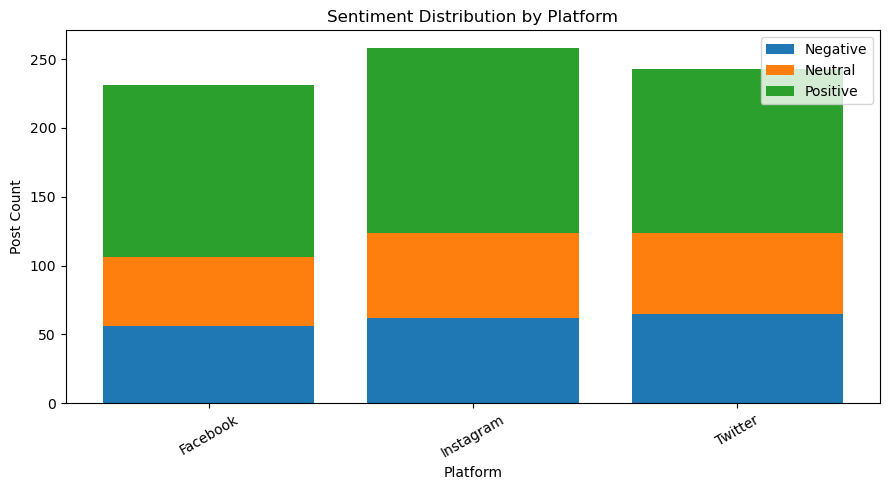

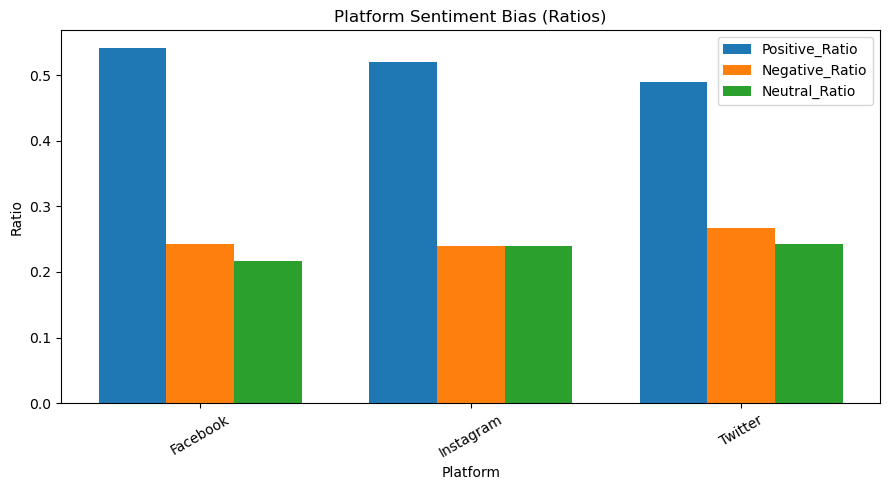

📑 Summary
Facebook: Positive 54.1%, Negative 24.2%, Neutral 21.6% → 🟢 Positive-leaning
Instagram: Positive 51.9%, Negative 24.0%, Neutral 24.0% → 🟢 Positive-leaning
Twitter: Positive 49.0%, Negative 26.7%, Neutral 24.3% → 🟢 Positive-leaning


In [5]:
# 3) Aggregate counts & ratios
count_tbl = (
    df.groupby(['Platform', 'Sentiment_Category'])
      .size()
      .unstack(fill_value=0)  # missing value imputation with 0
)

# Ensure all 3 columns exist
for col in ['Positive', 'Negative', 'Neutral']:
    if col not in count_tbl.columns:
        count_tbl[col] = 0

# Totals and ratios
count_tbl['Total'] = count_tbl[['Positive', 'Negative', 'Neutral']].sum(axis=1)
safe_total = count_tbl['Total'].replace(0, np.nan)  # Avoid division by zero
count_tbl['Positive_Ratio'] = count_tbl['Positive'] / safe_total
count_tbl['Negative_Ratio'] = count_tbl['Negative'] / safe_total
count_tbl['Neutral_Ratio']  = count_tbl['Neutral']  / safe_total

# 4) Correctness checks
# Count conservation
_num_ok = (count_tbl['Positive'] + count_tbl['Negative'] + count_tbl['Neutral'] == count_tbl['Total']).all()
assert _num_ok, "Counts don't sum to Total."

# Ratio conservation
ratio_sum = (count_tbl['Positive_Ratio'] + count_tbl['Negative_Ratio'] + count_tbl['Neutral_Ratio'])
ratio_ok = np.allclose(ratio_sum.dropna().values, np.ones(ratio_sum.dropna().shape[0]), rtol=1e-6, atol=1e-6)
assert ratio_ok, "Ratios don't sum to 1."

print("📊 Counts & Ratios by Platform")
display(count_tbl.sort_index())

# 5) Visualization in Matplotlib
# Stacked bar for composition
platforms = count_tbl.index.tolist()
pos_vals = count_tbl['Positive'].values
neg_vals = count_tbl['Negative'].values
neu_vals = count_tbl['Neutral'].values

plt.figure(figsize=(9, 5))
plt.bar(platforms, neg_vals, label='Negative')
plt.bar(platforms, neu_vals, bottom=neg_vals, label='Neutral')
plt.bar(platforms, pos_vals, bottom=neg_vals + neu_vals, label='Positive')
plt.title("Sentiment Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Post Count")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

# Ratio bars
ratio_tbl = count_tbl[['Positive_Ratio', 'Negative_Ratio', 'Neutral_Ratio']].copy()
x = np.arange(len(platforms))
width = 0.25

plt.figure(figsize=(9, 5))
plt.bar(x - width, ratio_tbl['Positive_Ratio'].values, width=width, label='Positive_Ratio')
plt.bar(x,           ratio_tbl['Negative_Ratio'].values, width=width, label='Negative_Ratio')
plt.bar(x + width,   ratio_tbl['Neutral_Ratio'].values,  width=width, label='Neutral_Ratio')
plt.title("Platform Sentiment Bias (Ratios)")
plt.xlabel("Platform")
plt.ylabel("Ratio")
plt.xticks(x, platforms, rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

# Summary
print("📑 Summary")
for plat, row in count_tbl.iterrows():
    pos = float(row['Positive_Ratio']) if not math.isnan(row['Positive_Ratio']) else 0.0
    neg = float(row['Negative_Ratio']) if not math.isnan(row['Negative_Ratio']) else 0.0
    neu = float(row['Neutral_Ratio'])  if not math.isnan(row['Neutral_Ratio'])  else 0.0
    if pos > max(neg, neu):
        bias = "🟢 Positive-leaning"
    elif neg > max(pos, neu):
        bias = "Negative-leaning"
    elif neu > max(pos, neg):
        bias = "Neutral-leaning"
    else:
        bias = "⚖️ No clear bias"
    print(f"{plat}: Positive {pos:.1%}, Negative {neg:.1%}, Neutral {neu:.1%} → {bias}")


## Word Cloud

In [6]:
# Dependencies
import sys, subprocess
pkgs = ["wordcloud", "jieba", "pillow", "matplotlib", "numpy", "pandas"]
subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", *pkgs])
print("Installed:", ", ".join(pkgs))

Installed: wordcloud, jieba, pillow, matplotlib, numpy, pandas


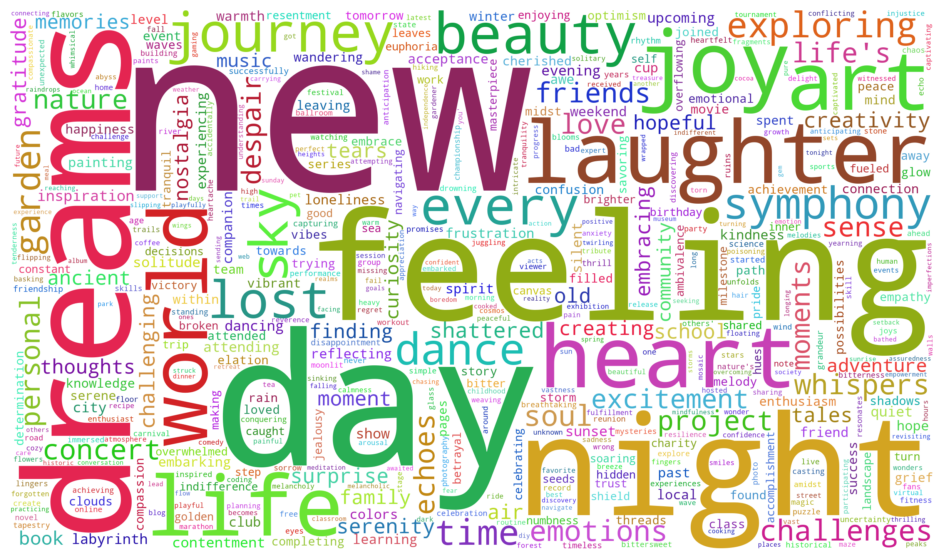

✅ Saved image: outputs\wordcloud_text.png


In [7]:
import os, re, math, random, colorsys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from matplotlib import rcParams, font_manager
from PIL import Image, ImageFont
from wordcloud import WordCloud, STOPWORDS
import jieba

# =============== Configurable Parameters ===============
OUT_DIR = "outputs" # Output folder for generated PNGs and top-token CSVs
CSV_FALLBACK_PATH = "/mnt/data/sentimentdataset.csv" # If no global df is found, fall back to reading this CSV
TEXT_COL_HINT = "text" # Preferred name of the text column (case-insensitive)
GROUP_BY_COL = None # If set (e.g., "Platform"), build one cloud per group; else a single cloud.
MASK_PATH = None # Optional mask image path (white=allowed area)
RAND_SEED = 42 # Random seed for reproducibility
IMG_SIZE = (2400, 1400) # Output resolution in pixels: width x height
MAX_WORDS = 500 # Maximum number of words to display
BACKGROUND_COLOR = "white" # Background color (e.g., "black").
RELATIVE_SCALING = 0.5 # Strength of frequency-to-font-size mapping (0~1)
PREFER_HORIZONTAL = 0.9 # Proportion of words drawn horizontally (0~1)
COLORMAP_NAME = None # If using Matplotlib colormap (e.g., "tab20"), set COLOR_FUNC=None and set this
# =====================================================

random.seed(RAND_SEED); np.random.seed(RAND_SEED)

# Pre-configure fonts to minimize missing glyph warnings for CJK
rcParams["font.sans-serif"] = ["SimHei","Microsoft YaHei","Arial Unicode MS","DejaVu Sans"]
rcParams["axes.unicode_minus"] = False

# Text cleaning & tokenization
URL  = re.compile(r"https?://\S+|www\.\S+", re.I) # strip URLs
AT   = re.compile(r"@[A-Za-z0-9_]+") # strip @mentions
HASH = re.compile(r"#") # remove '#'
HTML = re.compile(r"&[A-Za-z]+;") # handle HTML entities
CN_CHAR = re.compile(r"[\u4e00-\u9fff]") # detect CJK chars
EN_ONLY = re.compile(r"[^a-z']+") # keep [a-z'] only

def clean_line(s: str) -> str:
    # Basic cleaning: lowercase, strip URL/@/HTML/entities, collapse spaces
    s = str(s).lower()
    s = URL.sub(" ", s); s = AT.sub(" ", s); s = HASH.sub("", s); s = HTML.sub(" ", s)
    return re.sub(r"\s+", " ", s).strip()

def tokenize_mixed(text: str):
    if CN_CHAR.search(text):
        return [t.strip() for t in jieba.cut(text) if t.strip()]
    t = EN_ONLY.sub(" ", text)
    return [w for w in t.split() if w]

# Stopwords
EN_STOP = set(STOPWORDS) | {
    "rt","amp","im","ive","dont","didnt","doesnt","cant","couldnt","isnt","wasnt",
    "arent","werent","youre","youve","youll","theyre","weve","well","hes","shes",
    "thats","theres","whats","a","an","the","is","are","was","were","be","been","being",
    "i","me","my","myself","we","our","ours","ourselves","you","your","yours","yourself","yourselves",
    "he","him","his","himself","she","her","hers","herself","it","its","itself","they","them","their","theirs","themselves",
    "this","that","these","those","and","but","if","or","because","as","until","while",
    "of","at","by","for","with","about","against","between","into","through","during","before","after",
    "above","below","to","from","up","down","in","out","on","off","over","under",
    "again","further","then","once","here","there","when","where","why","how","all","any","both","each",
    "few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too","very",
    "s","t","can","will","just","don","should","now"
}

STOP = EN_STOP

# Optional mask loader (white pixels = allowed region for words).
def load_mask(mask_path):
    if not mask_path:
        return None
    img = Image.open(mask_path).convert("L") # convert to grayscale
    arr = np.array(img)
    # Treat bright area as 255 (allowed), others 0
    return np.where(arr > 200, 255, 0).astype(np.uint8)

MASK_ARRAY = load_mask(MASK_PATH)

# Resolve the text column in a case-insensitive way
def get_text_series(df, col_hint="text"):
    cmap = {c.lower().strip(): c for c in df.columns}
    if col_hint.lower() in cmap:
        col = cmap[col_hint.lower()]
    else:
        cands = [c for c in df.columns if "text" in c.lower()]
        if not cands:
            raise KeyError("Text column not found")
        col = cands[0]
    return df[col].astype(str).fillna("")

# Color strategy (two options)
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Soft random HLS colors within readable saturation/lightness ranges
    h = random.randint(0, 359) / 360.0
    s = random.randint(55, 85) / 100.0
    l = random.randint(35, 60) / 100.0
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return (int(r*255), int(g*255), int(b*255))

# Matplotlib colormap (e.g., "tab20"), set COLORMAP_NAME and set COLOR_FUNC=None.
COLOR_FUNC = color_func if COLORMAP_NAME is None else None
COLOR_FUNC = color_func if COLORMAP_NAME is None else None

# Main entry: build a word cloud from a pandas Series of text and export PNG
def build_wordcloud_from_series(text_series: pd.Series, out_prefix: str):
    cleaned = text_series.map(clean_line)

    tokens = []
    for line in cleaned:
        for t in tokenize_mixed(line):
            if t not in STOP and len(t) > 1:
                tokens.append(t)

    if not tokens:
        raise ValueError("No valid terms detected after preprocessing. Please check input or adjust the stopword settings.")

    freq = Counter(tokens) # Frequency count

    # Persist top-N token frequencies for audit/plots
    os.makedirs(OUT_DIR, exist_ok=True)
    pd.DataFrame(freq.most_common(300), columns=["token","count"])\
      .to_csv(os.path.join(OUT_DIR, f"{out_prefix}_top_tokens.csv"), index=False)

    wc = WordCloud(
        width=IMG_SIZE[0], height=IMG_SIZE[1],
        background_color=BACKGROUND_COLOR,
        max_words=MAX_WORDS,
        prefer_horizontal=PREFER_HORIZONTAL,
        relative_scaling=RELATIVE_SCALING,
        mask=MASK_ARRAY,
        colormap=COLORMAP_NAME        # If COLOR_FUNC is set, recolor below overrides this
    ).generate_from_frequencies(freq)

    # Optional recolor with custom function
    if COLOR_FUNC is not None:
        wc = wc.recolor(color_func=COLOR_FUNC, random_state=RAND_SEED)

    # Export the PNG
    out_png = os.path.join(OUT_DIR, f"{out_prefix}.png")
    wc.to_file(out_png)

    # Preview in notebooks
    plt.figure(figsize=(12, 7))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    print(f"✅ Saved image: {out_png}")
    return out_png

# Read df if not provided externally
try:
    _ = df
except NameError:
    if not os.path.exists(CSV_FALLBACK_PATH):
        raise FileNotFoundError("No DataFrame detected, and the CSV file could not be found. Please load the DataFrame or update the CSV_FALLBACK_PATH.")
    df = pd.read_csv(CSV_FALLBACK_PATH, low_memory=False)

# Run: one overall cloud or per-group multiple clouds
if GROUP_BY_COL:
    # Group by the column and build one cloud per group
    for key, g in df.groupby(GROUP_BY_COL):
        try:
            text_s = get_text_series(g, TEXT_COL_HINT)
            build_wordcloud_from_series(text_s, out_prefix=f"wordcloud_{GROUP_BY_COL}_{key}")
        except Exception as e:
            # Some groups may be empty after cleaning; safely skip
            print(f"skip {GROUP_BY_COL}={key}: {e}")
else:
    text_s = get_text_series(df, TEXT_COL_HINT)
    build_wordcloud_from_series(text_s, out_prefix="wordcloud_text")
